In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv('apple_raw_data.csv')

# Convert the 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Sort the data by date
data = data.sort_values('date')

# Use the 'adjusted_close' column as the target for prediction
prices = data['adjusted_close'].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices.reshape(-1, 1))


In [6]:
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 60  # Using 60 days for prediction
X, y = create_sequences(scaled_prices, seq_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


c:\Users\Fatimah\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Reshape data for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5
272/272 ━━━━━━━━━━━━━━━━━━━━ 27s 65ms/step - loss: 1.0998e-04 - val_loss: 0.0057
Epoch 2/5
272/272 ━━━━━━━━━━━━━━━━━━━━ 19s 69ms/step - loss: 1.2605e-05 - val_loss: 0.0026
Epoch 3/5
272/272 ━━━━━━━━━━━━━━━━━━━━ 18s 68ms/step - loss: 1.4817e-05 - val_loss: 0.0024
Epoch 4/5
272/272 ━━━━━━━━━━━━━━━━━━━━ 27s 98ms/step - loss: 9.4429e-06 - val_loss: 0.0013
Epoch 5/5
272/272 ━━━━━━━━━━━━━━━━━━━━ 25s 93ms/step - loss: 1.2857e-05 - val_loss: 0.0022


68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step


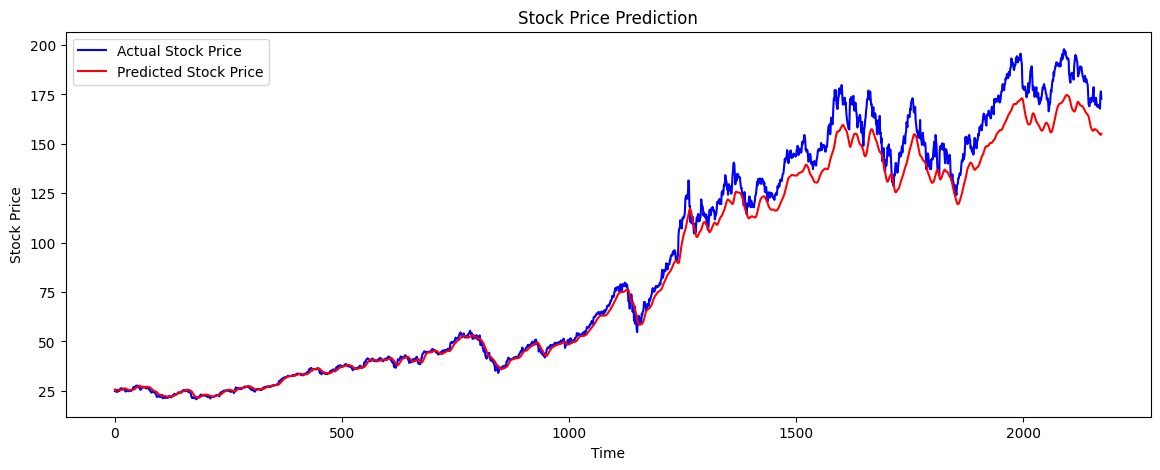

In [9]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Inverse transform the true values
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step


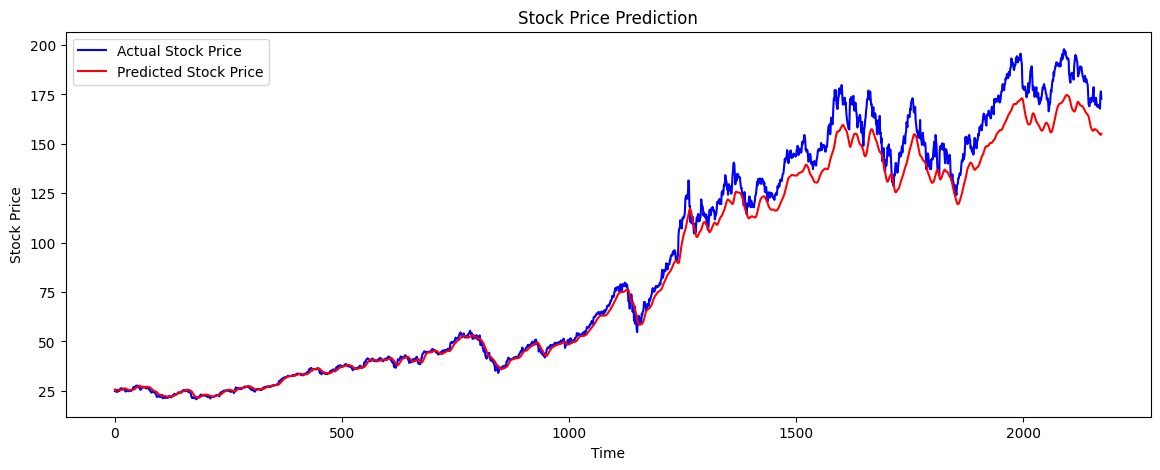

In [10]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Inverse transform the true values
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [11]:
# Save the model
model.save('stock_price_lstm_model.h5')

# Load the model
# from tensorflow.keras.models import load_model
# model = load_model('stock_price_lstm_model.h5')
